In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# PCA主成分分析-titanic data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [5]:
pwd

'D:\\Learning Note\\Python\\ipythonnb\\機器學習資策會'

In [43]:
titanic = pd.read_csv("data\\titanic.csv")
print(titanic.head())
print(titanic.shape)

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

### Fearture Engineer

In [6]:
from sklearn import feature_extraction

def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names() # modify column names
    vecData.index = data.index # modify index names
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData) # return original data and transformed data

In [44]:
titanic, titanic_n = one_hot_dataframe(titanic, ['pclass', 'embarked', 'sex'], replace=True)

In [45]:
print (titanic.shape)
print (titanic_n.shape)
print (type(titanic))
print (list(titanic.columns.values)) # 屬性名稱(column values)
print (list(titanic_n.columns.values)) # 屬性名稱(column values)

(1313, 17)
(1313, 9)
<class 'pandas.core.frame.DataFrame'>
['row.names', 'survived', 'name', 'age', 'home.dest', 'room', 'ticket', 'boat', 'embarked', 'embarked=Cherbourg', 'embarked=Queenstown', 'embarked=Southampton', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']
['embarked', 'embarked=Cherbourg', 'embarked=Queenstown', 'embarked=Southampton', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']


In [18]:
titanic

,row.names,survived,name,age,home.dest,room,ticket,boat,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd,sex=female,sex=male
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,"St Louis, MO",B-5,24160 L221,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2,0,"Allison, Miss Helen Loraine",2.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3,0,"Allison, Mr Hudson Joshua Creighton",30.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5,1,"Allison, Master Hudson Trevor",0.9167,"Montreal, PQ / Chesterville, ON",C22,NaN,11,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,6,1,"Anderson, Mr Harry",47.0000,"New York, NY",E-12,NaN,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,7,1,"Andrews, Miss Kornelia Theodosia",63.0000,"Hudson, NY",D-7,13502 L77,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,8,0,"Andrews, Mr Thomas, jr",39.0000,"Belfast, NI",A-36,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,9,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,"Bayside, Queens, NY",C-101,NaN,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,10,0,"Artagaveytia, Mr Ramon",71.0000,"Montevideo, Uruguay",NaN,NaN,(22),0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
titanic, titanic_n = one_hot_dataframe(titanic, ['home.dest', 'room', 'ticket', 'boat'], replace=True) # titanic_n only contains the previously created columns

In [21]:
print (titanic.shape)
print (titanic_n.shape)
print (type(titanic))
print (list(titanic.columns.values)) # 屬性名稱(column values)
print (list(titanic_n.columns.values)) # 屬性名稱(column values)

(1313, 581)
(1313, 4)
<class 'pandas.core.frame.DataFrame'>
['row.names', 'survived', 'name', 'age', 'embarked', 'embarked=Cherbourg', 'embarked=Queenstown', 'embarked=Southampton', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male', 'boat=(101)', 'boat=(103)', 'boat=(108)', 'boat=(109)', 'boat=(110)', 'boat=(121)', 'boat=(122)', 'boat=(124)', 'boat=(126)', 'boat=(130)', 'boat=(133)', 'boat=(135)', 'boat=(140)', 'boat=(142)', 'boat=(147)', 'boat=(148)', 'boat=(149)', 'boat=(15)', 'boat=(165)', 'boat=(166)', 'boat=(169)', 'boat=(17)', 'boat=(171)', 'boat=(172)', 'boat=(174)', 'boat=(175)', 'boat=(18)', 'boat=(189)', 'boat=(19)', 'boat=(190)', 'boat=(207)', 'boat=(208)', 'boat=(209)', 'boat=(22)', 'boat=(230)', 'boat=(232)', 'boat=(234)', 'boat=(236)', 'boat=(241)', 'boat=(245)', 'boat=(249)', 'boat=(256)', 'boat=(258)', 'boat=(259)', 'boat=(260)', 'boat=(263)', 'boat=(269)', 'boat=(271)', 'boat=(275)', 'boat=(283)', 'boat=(286)', 'boat=(287)', 'boat=(292)', 'boat=(293)',

In [46]:
mean = titanic['age'].mean() # 下行需要mean
titanic['age'].fillna(mean, inplace=True) # Pandas allow us to replace them with a fixed value using the fillna method

### Training Model

In [76]:
titanic_data, titanic_target = titanic.drop(['name','embarked', 'row.names', 'survived','home.dest','room','ticket','boat'], axis=1), titanic['survived']

PCA meodel

In [77]:
from sklearn.decomposition import PCA

In [87]:
estimator = PCA(n_components = 5)
target_name = array(["survived","unsurvived"])

In [88]:
X_pca = estimator.fit_transform(titanic_data)

In [89]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(2):
        px = X_pca[:, 0][titanic_target == i]
        py = X_pca[:, 1][titanic_target == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(target_name)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


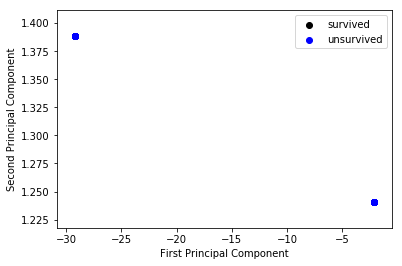

In [90]:
plot_pca_scatter()

In [83]:
 px = X_pca[:, 0][titanic_target == 0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


### 鐵達尼號資料似乎不太適合用PCA分析